In [1]:
from tifffile import imsave

100%|██████████| 2/2 [00:00<00:00, 1832.37it/s]


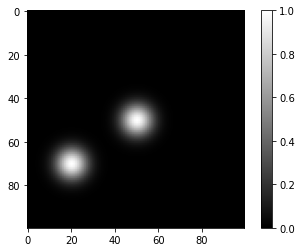

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pdb

def gaussian_2d(xx, yy, sigma_x, sigma_y, amplitude):
    exponent_x = (xx ** 2) / (2 * (sigma_x ** 2))
    exponent_y = (yy ** 2) / (2 * (sigma_y ** 2))
    return amplitude * np.exp(-(exponent_x + exponent_y))

def simulate_point_sources(image_size, fluorophore_coords_list, sigma_x, sigma_y, amplitude, truncate=4):
    image = np.zeros(image_size, dtype=np.float64)

    # The number of standard deviations to consider for the Gaussian function.
    # The default value, 4, should be enough to cover most of the intensity values.
    half_region_x = int(truncate * sigma_x)
    half_region_y = int(truncate * sigma_y)

    x = np.arange(image_size[0])
    y = np.arange(image_size[1])

    for coords in tqdm(fluorophore_coords_list):
        x0, y0 = coords
        x_start, x_end = max(0, x0 - half_region_x), min(image_size[0], x0 + half_region_x + 1)
        y_start, y_end = max(0, y0 - half_region_y), min(image_size[1], y0 + half_region_y + 1)

        xx, yy = np.meshgrid(x[x_start:x_end] - x0, y[y_start:y_end] - y0, indexing='ij')

        gaussian_patch = gaussian_2d(xx, yy, sigma_x, sigma_y, amplitude)
#         breakpoint()
        image[x_start:x_end, y_start:y_end] += gaussian_patch

    return image

# Set image size, fluorophore coordinates list, and Gaussian distribution parameters
image_size = (100, 100)
fluorophore_coords_list = [(50, 50), (70, 20)]
sigma_x = 5
sigma_y = 5
amplitude = 1

# Simulate the microscope image with multiple point sources of light
image = simulate_point_sources(image_size, fluorophore_coords_list, sigma_x, sigma_y, amplitude)

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.show()


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/data/petar/fgf1/resolve/32810-1377-slide3_submission/32810-1377-slide3_A1-1_results.txt', sep='\t', header=None)

In [5]:
fluorophore_coords_list = [(x, y) for x, y in zip(df[0].tolist(), df[1].tolist())]

In [6]:
x_max = max([x[0] for x in fluorophore_coords_list])
y_max = max([x[1] for x in fluorophore_coords_list])
image_size = (x_max, y_max)
image_size

(10717, 17144)

In [7]:
# Simulate the microscope image with multiple point sources of light

image = simulate_point_sources(image_size, fluorophore_coords_list, sigma_x, sigma_y, amplitude)

100%|██████████| 3282829/3282829 [04:26<00:00, 12330.66it/s]


In [8]:
# Save the image as a TIFF file
imsave('microscope_image.tiff', image.astype(np.float32))

/tmp/ipykernel_20524/256086594.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('microscope_image.tiff', image.astype(np.float32))
